In [ ]:
#!unzip "/content/drive/MyDrive/Projects/Canine Vision/dog-breed-identification.zip" -d "/content/drive/MyDrive/Projects/Canine Vision/"

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
print("TF version: ", tf.__version__)
print("TF-Hub version: ", hub.__version__)

print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

TF version:  2.12.0
TF-Hub version:  0.13.0
GPU available


In [ ]:
import pandas as pd

labels_csv = pd.read_csv("/content/drive/MyDrive/Projects/Canine Vision/labels.csv")

In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


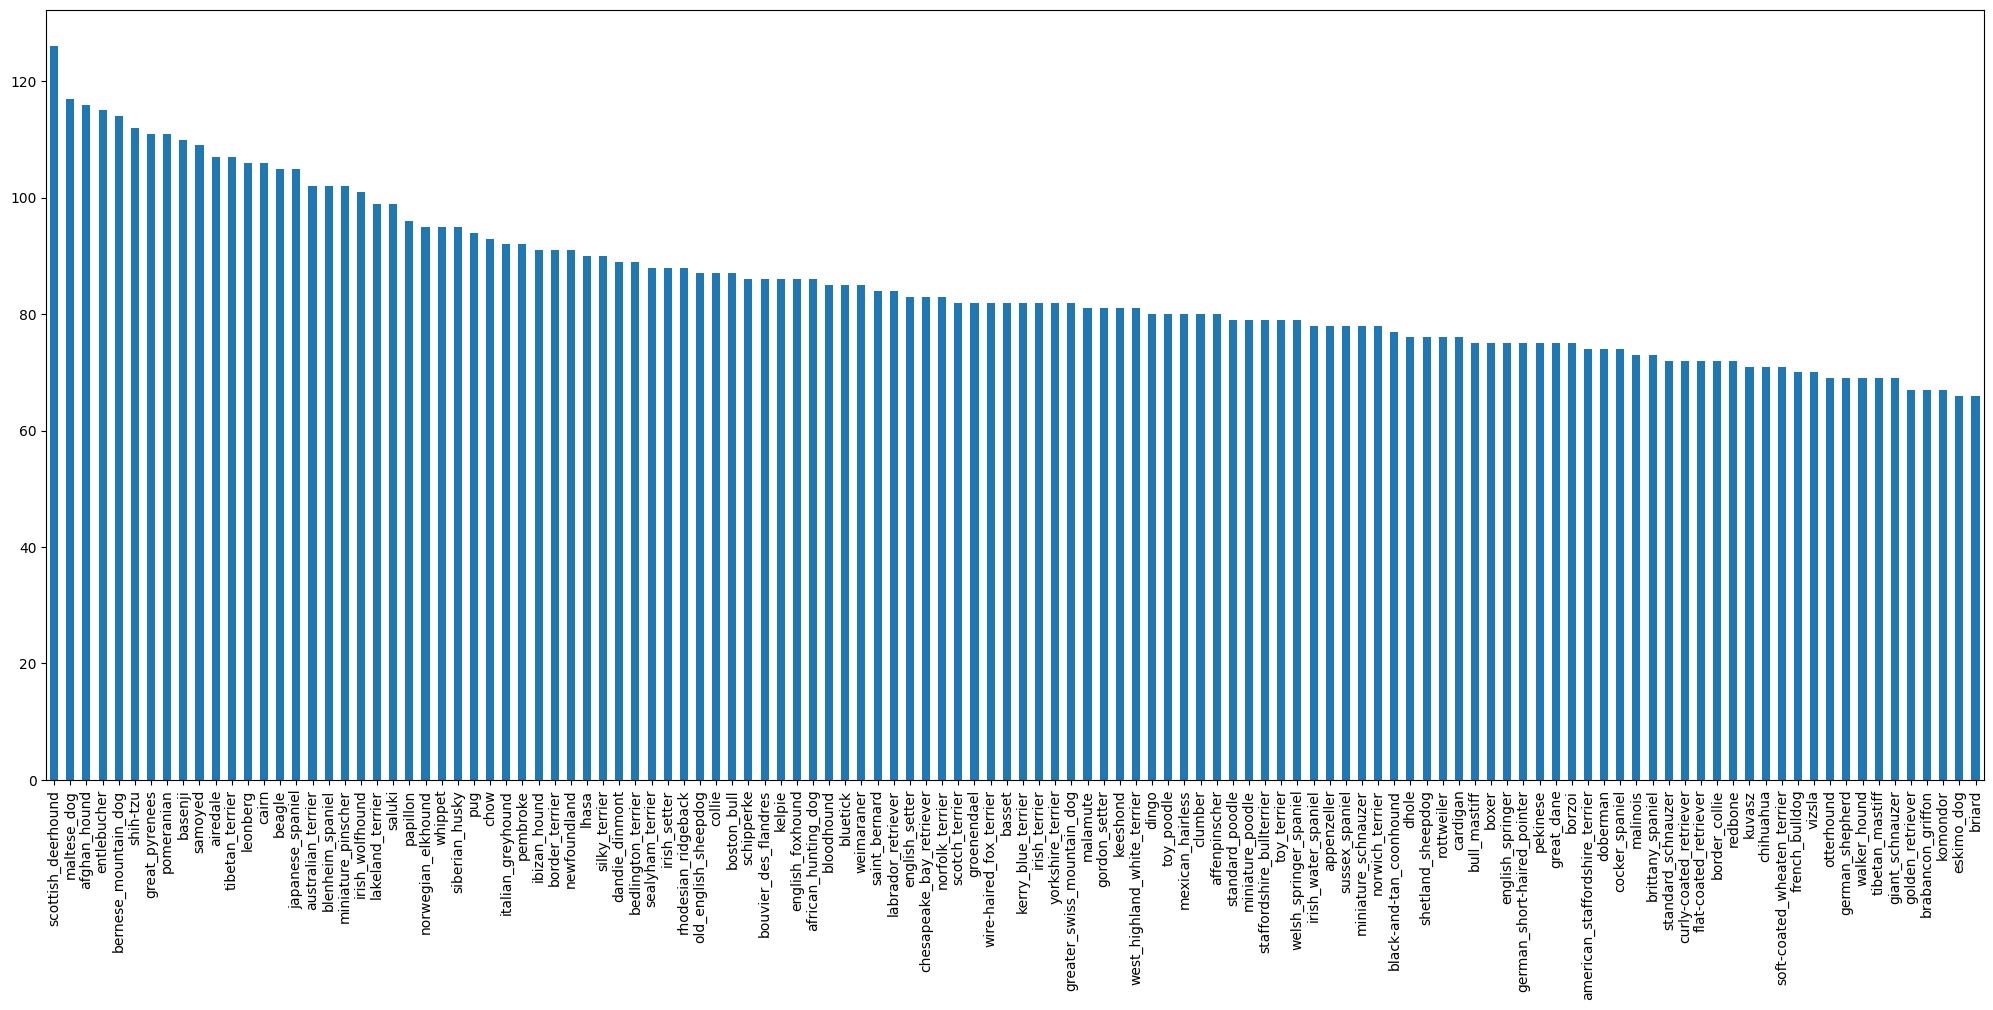

In [ ]:
labels_csv['breed'].value_counts().plot.bar(figsize=(25, 10));

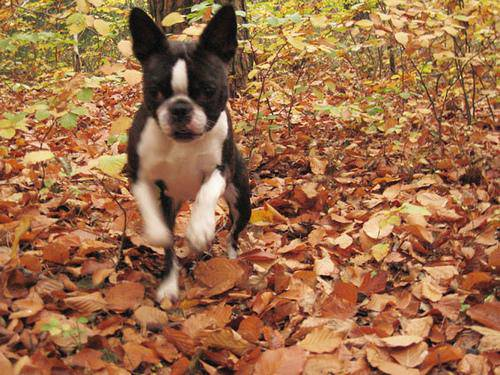

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/Projects/Canine Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

In [ ]:
#Creating a list of pathnames from image ID's
filenames = ["/content/drive/MyDrive/Projects/Canine Vision/train/" + fname + ".jpg"
             for fname in labels_csv["id"]]

#Checking first 10
filenames[:10]

['/content/drive/MyDrive/Projects/Canine Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Projects/Canine Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Projects/Canine Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Projects/Canine Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Projects/Canine Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Projects/Canine Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Projects/Canine Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Projects/Canine Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Projects/Canine Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Projects/Canine Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
#Checking if number of filenames match the number of images in training set

import os
if len(os.listdir("drive/MyDrive/Projects/Canine Vision/train/")) == len(filenames):
  print("Its a match")
else:
  print("Mismatch")

Its a match


In [ ]:
import numpy as np
labels = labels_csv["breed"]
labels = np.array(labels)

labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
unique_breeds = np.unique(labels)
len(unique_breeds)

120